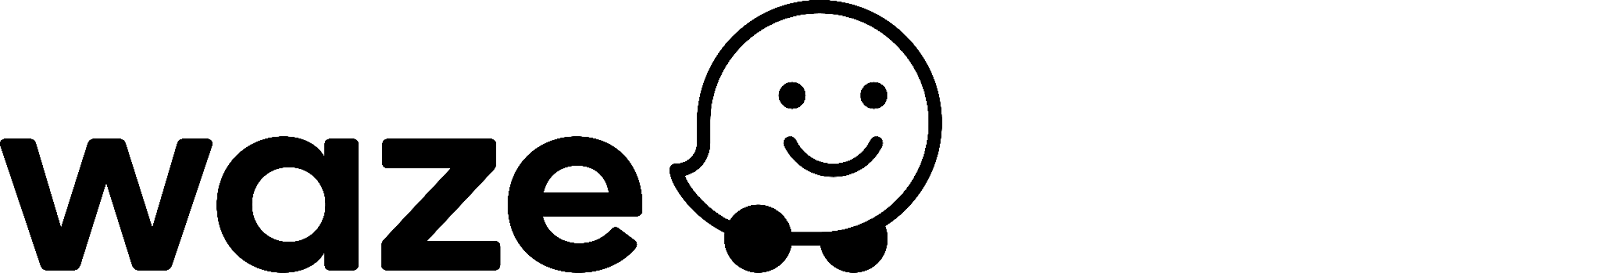

**Background**: 

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer.

**Goal:** Investigate and understand the data, and prepare for exploratory data analysis. 

### Imports and data loading

Start by importing the packages that you will need to load and explore the dataset.

In [1]:
#import packages for data manipulation
import pandas as pd
import numpy as np

Then, load the dataset into a dataframe. Creating a dataframe will help in data manipulation, exploratory data analysis (EDA), and statistical activities.

In [2]:
#load dataset into dataframe
df = pd.read_csv("/kaggle/input/waze-dataset/waze_dataset.csv")

View and inspect summary information about the dataframe.

In [3]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


>None of the variables in the first 10 observations have missing values. Note that this does not imply the whole dataset does not have any missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


* The variables `label` and `device` are of type `object`; `total_sessions`, `driven_km_drives`, and `duration_minutes_drives` are of type `float64`; the rest of the variables are of type `int64`. There are 14,999 rows and 13 columns.

* The dataset has 700 missing values in the `label` column.

### Null values and summary statistics

Compare the summary statistics of the 700 rows that are missing labels with summary statistics of the rows that are not missing any values.

In [5]:
# Isolate rows with null values
null_df = df[df['label'].isnull()]

# Display summary stats of rows with null values
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [6]:
# Isolate rows with null values
not_null_df = df[~df['label'].isnull()]

# Display summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


> Comparing summary statistics of the observations with missing retention labels with those that aren't missing any values reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

### Null values - device counts

Check the two populations with respect to the `device` variable.

In [7]:
# Get count of null values by device
null_df['device'].value_counts()

iPhone     447
Android    253
Name: device, dtype: int64

> Of the 700 rows with null values, 447 were iPhone users and 253 were Android users.

Now, of the rows with null values, calculate the percentage with each device&mdash;Android and iPhone:

In [8]:
# Calculate % of iPhone nulls and Android nulls
null_df['device'].value_counts(normalize=True)

iPhone     0.638571
Android    0.361429
Name: device, dtype: float64

In [9]:
# Calculate % of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64

>The percentage of missing values by each device is consistent with their representation in the data overall.There is nothing to suggest a non-random cause of the missing data.

Counts and percentages of users who churned vs. those who were retained:

In [10]:
print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

retained    11763
churned      2536
Name: label, dtype: int64

retained    0.822645
churned     0.177355
Name: label, dtype: float64


>This dataset contains 82% retained users and 18% churned users.

Compare the medians of each variable for churned and retained users:

The reason for calculating the median and not the mean is that we don't want outliers to unduly affect the portrayal of a typical user. Notice, for example, that the maximum value in the `driven_km_drives` column is 21,183 km. That's more than half the circumference of the earth! (Mean is subject to the influence of outliers, while the median represents the middle value of the distribution regardless of any outlying values.)

In [11]:
# Calculate median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


>Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

>The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

>It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile.

Median kilometers per drive both retained and churned users:

In [12]:
# Group data by `label` and calculate the medians
medians_by_label = df.groupby('label').median(numeric_only=True)

print('Median kilometers per drive:')

# Divide the median distance by median number of drives
medians_by_label['driven_km_drives'] / medians_by_label['drives']

Median kilometers per drive:


label
churned     73.053113
retained    73.716694
dtype: float64

>The median user from both groups drove ~73 km/drive.

Median kilometers per driving day:

In [13]:
# Divide the median distance by median number of driving days
print("Median kilometers per driving day:")
medians_by_label['driven_km_drives']/medians_by_label['driving_days']

Median kilometers per driving day:


label
churned     608.775944
retained    247.477472
dtype: float64

Median number of drives per driving day for each group:

In [14]:
# Divide the median number of drives by median number of driving days
print('Median drives per driving day:')
medians_by_label['drives']/medians_by_label['driving_days']

Median drives per driving day:


label
churned     8.333333
retained    3.357143
dtype: float64

The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data&mdash;and in particular the sample of churned users&mdash;contains a high proportion of long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

Finally, examine whether there is an imbalance in how many users churned by device type.

Begin by getting the overall counts of each device type for each group, churned and retained.

In [15]:
# For each label, calculate the number of Android users and iPhone users
df.groupby(['label','device']).size()

# 2nd method:  df.groupby('label')['device'].value_counts()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

Now, within each group, churned and retained, calculate what percent was Android and what percent was iPhone.

In [16]:
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: device, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

# Key Insights:
* This dataset contains 82% retained users and 18% churned users.

* The dataset contains 12 unique variables with types including objects, floats, and integers; the label column is missing 700 values with no indication that the omissions are non-random.

* Churned users averaged ~3 more drives in the last month than retained users.

* Retained users used the app on over twice as many days as churned users in the last month.

* The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

* Churned users had more drives in fewer days,and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile.

* The median user who churned drove 608 kilometers each day they drove last month,which is almost 250% the per-drive-day distance of retained users.

* Regardless of user churn, the users represented in this data drive a lot! It is probably safe to assume that this data does not represent typical drivers at large.


# Next Steps:

Conduct thorough EDA and develop data visualizations to illustrate the narrative behind the data and guide future project decisions.